In [6]:
import pandas as pd
import numpy as np

# Load Excel files
city = pd.read_excel("City.xlsx")
continent = pd.read_excel("Continent.xlsx")
country = pd.read_excel("Country.xlsx")
item = pd.read_excel("Item.xlsx")
mode = pd.read_excel("Mode.xlsx")
region = pd.read_excel("Region.xlsx")
transaction = pd.read_excel("Transaction.xlsx")
user = pd.read_excel("User.xlsx")
type_df = pd.read_excel("Type.xlsx")
attraction=pd.read_excel("uitem.xlsx")


In [7]:
#Data cleaning
mode.drop(index=0,inplace=True)
city.fillna('unknown',inplace=True)
continent.drop(index=0, inplace=True)
country.drop(index=0, inplace=True)
region.drop(index=0, inplace=True)
user.fillna("0", inplace=True)
# Remove duplicates
city.drop_duplicates(inplace=True)
continent.drop_duplicates(inplace=True)
country.drop_duplicates(inplace=True)
region.drop_duplicates(inplace=True)
transaction.drop_duplicates(inplace=True)
user.drop_duplicates(inplace=True)
item.drop_duplicates(inplace=True)
mode.drop_duplicates(inplace=True)
type_df.drop_duplicates(inplace=True)




C:\Users\guna8\AppData\Local\Temp\ipykernel_4336\2761759674.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  user.fillna("0", inplace=True)


In [3]:
# Check for valid foreign keys
print(transaction['UserId'].isin(user['UserId']).all())
print(transaction['AttractionId'].isin(item['AttractionId']).all())



True
True


In [9]:

df = transaction.merge(user, on='UserId', how='left')

df['CityId'] = df['CityId'].astype(int)
city['CityId'] = city['CityId'].astype(int)
df = df.merge(city, on='CityId', how='left')

df = df.merge(country, left_on='CountryId_x', right_on='CountryId', how='left')

df.drop(columns=['CountryId_y', 'CountryId'], inplace=True)
df.rename(columns={'CountryId_x': 'CountryId'}, inplace=True)

df = df.merge(region, left_on='RegionId_x', right_on='RegionId', how='left')
df.drop(columns=['RegionId_y','RegionId'], inplace=True)
df.rename(columns={'RegionId_x': 'RegionId'}, inplace=True)

df = df.merge(continent, left_on='ContinentId_x', right_on='ContinentId', how='left')
df.drop(columns=['ContinentId_y', 'ContinentId'], inplace=True)
df.rename(columns={'ContinentId_x': 'ContinentId'}, inplace=True)

df = df.merge(item, on='AttractionId', how='left')
df['AttractionTypeId'] = df['AttractionTypeId'].astype(int)
df = df.merge(type_df, on='AttractionTypeId', how='left')

df['VisitMode'] = df['VisitMode'].astype(str)
mode['VisitModeId'] = mode['VisitModeId'].astype(str)

df = df.merge(mode, left_on='VisitMode', right_on='VisitModeId', how='left')
df.drop(columns=['VisitMode_x'], inplace=True)
df.rename(columns={'VisitMode_y': 'VisitMode'}, inplace=True)




In [11]:
df

,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId,...,Country,Region,Continent,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,VisitMode
0,3,70456,2022,10,640,5,5,21,163,4341,...,United Kingdom,Western Europe,Europe,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,Couples
1,8,7567,2022,10,640,5,2,8,48,464,...,Canada,Northern America,America,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4,Friends
2,9,79069,2022,10,640,5,2,9,54,774,...,Brazil,South America,America,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,Family
3,10,31019,2022,10,640,3,5,17,135,583,...,Switzerland,Central Europe,Europe,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,Family
4,15,43611,2022,10,640,3,5,21,163,1396,...,United Kingdom,Western Europe,Europe,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,Couples
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,1297,4,5,21,159,7460,...,France,Western Europe,Europe,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,2,Couples
52926,211238,88112,2016,2,1297,5,5,17,133,6164,...,Slovakia,Central Europe,Europe,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,2,Couples
52927,211239,88112,2016,2,1297,4,5,17,133,6164,...,Slovakia,Central Europe,Europe,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,2,Couples
52928,211240,88112,2016,2,1297,4,5,17,133,6164,...,Slovakia,Central Europe,Europe,3,44,Yogyakarta Palace,Yogyakarta,Historic Sites,2,Couples


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TransactionId      52930 non-null  int64 
 1   UserId             52930 non-null  int64 
 2   VisitYear          52930 non-null  int64 
 3   VisitMonth         52930 non-null  int64 
 4   AttractionId       52930 non-null  int64 
 5   Rating             52930 non-null  int64 
 6   ContinentId        52930 non-null  int64 
 7   RegionId           52930 non-null  int64 
 8   CountryId          52930 non-null  int64 
 9   CityId             52930 non-null  int64 
 10  CityName           52930 non-null  object
 11  Country            52930 non-null  object
 12  Region             52898 non-null  object
 13  Continent          52930 non-null  object
 14  AttractionCityId   52930 non-null  int64 
 15  AttractionTypeId   52930 non-null  int64 
 16  Attraction         52930 non-null  objec

# EDA

1. User Distribution Across Continents, Countries, and Regions

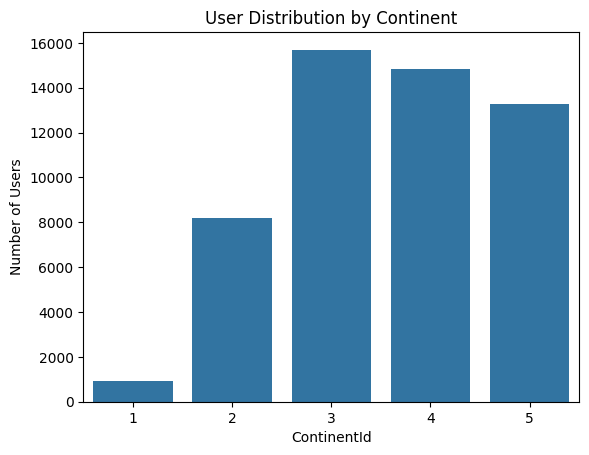

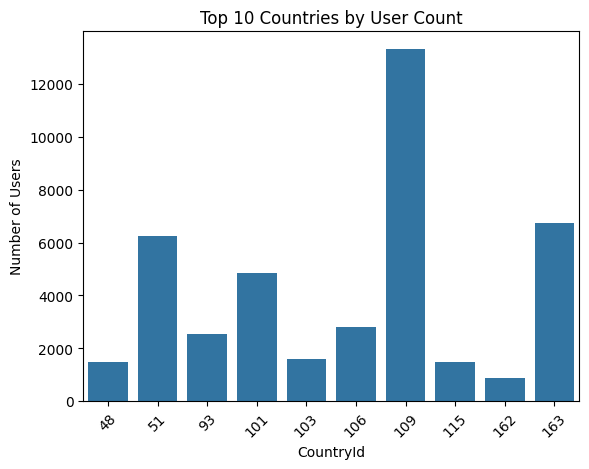

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Users by Continent
continent_dist = df['ContinentId'].value_counts()
sns.barplot(x=continent_dist.index, y=continent_dist.values)
plt.title('User Distribution by Continent')
plt.xlabel('ContinentId')
plt.ylabel('Number of Users')
plt.show()

# Users by Country
country_dist = df['CountryId'].value_counts().head(10)
sns.barplot(x=country_dist.index, y=country_dist.values)
plt.title('Top 10 Countries by User Count')
plt.xlabel('CountryId')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


2. Attraction Types & Popularity Based on Ratings

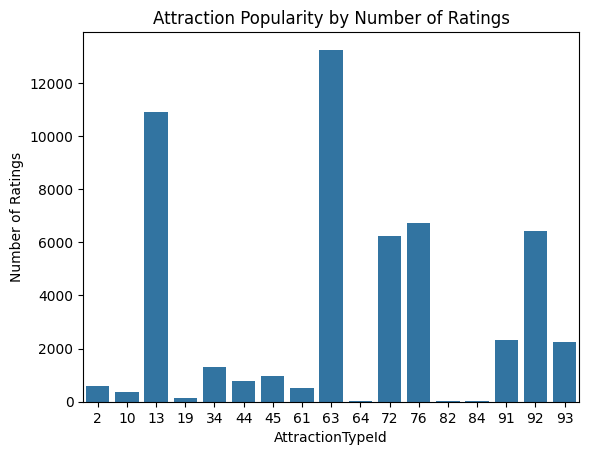

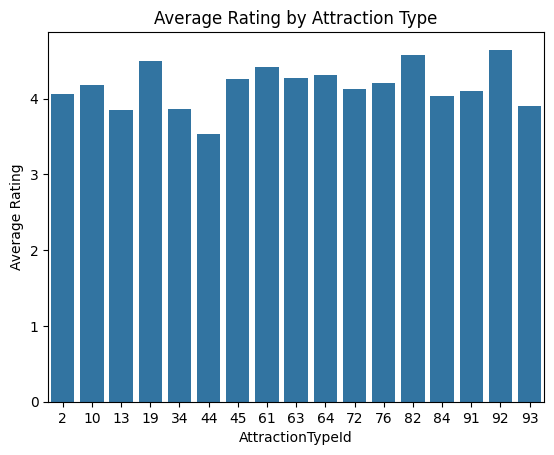

In [6]:
# Average rating per attraction type
attraction_popularity = df.groupby('AttractionTypeId')['Rating'].agg(['count', 'mean']).reset_index()
attraction_popularity = attraction_popularity.sort_values('count', ascending=False)

# Bar plot for count of ratings by type
sns.barplot(x='AttractionTypeId', y='count', data=attraction_popularity)
plt.title('Attraction Popularity by Number of Ratings')
plt.xlabel('AttractionTypeId')
plt.ylabel('Number of Ratings')
plt.show()

# Bar plot for average rating by type
sns.barplot(x='AttractionTypeId', y='mean', data=attraction_popularity)
plt.title('Average Rating by Attraction Type')
plt.xlabel('AttractionTypeId')
plt.ylabel('Average Rating')
plt.show()


3. Correlation Between VisitMode and Demographics (e.g., ContinentId, CountryId)

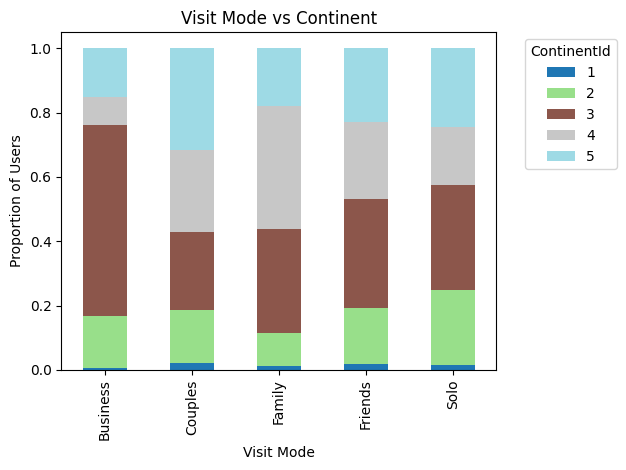

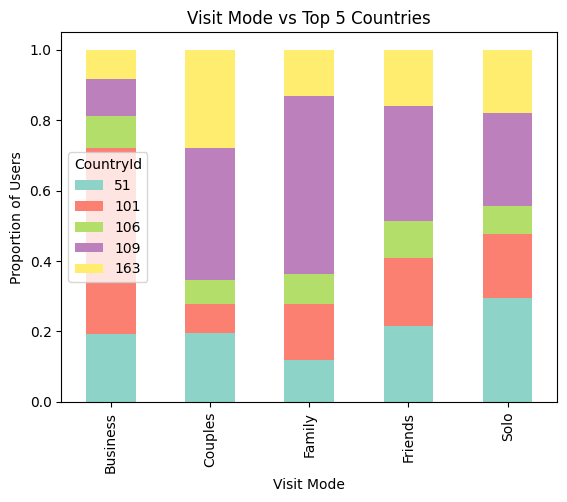

In [7]:
# Visit mode vs continent
visit_continent = pd.crosstab(df['VisitMode'], df['ContinentId'], normalize='index')
visit_continent.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Visit Mode vs Continent')
plt.xlabel('Visit Mode')
plt.ylabel('Proportion of Users')
plt.legend(title='ContinentId', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visit mode vs country (Top 5 countries)
top_countries = df['CountryId'].value_counts().head(5).index
subset = df[df['CountryId'].isin(top_countries)]
visit_country = pd.crosstab(subset['VisitMode'], subset['CountryId'], normalize='index')
visit_country.plot(kind='bar', stacked=True, cmap='Set3')
plt.title('Visit Mode vs Top 5 Countries')
plt.xlabel('Visit Mode')
plt.ylabel('Proportion of Users')
plt.legend(title='CountryId')
plt.show()


4. Distribution of Ratings Across Attractions and Regions

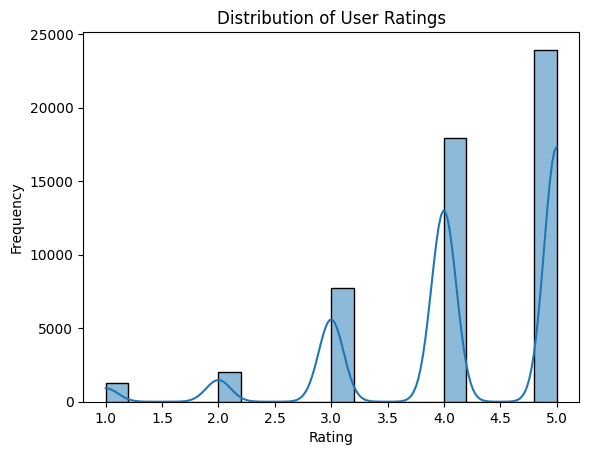

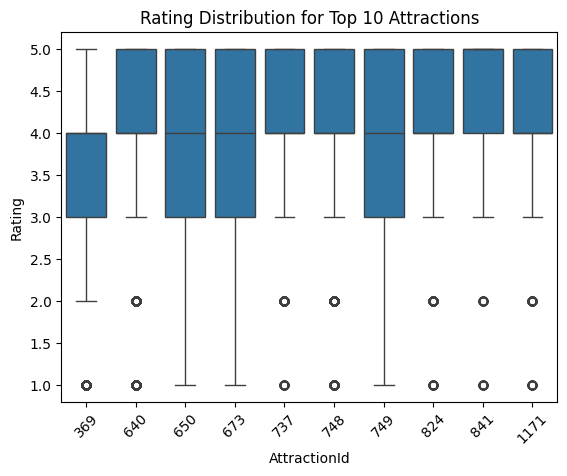

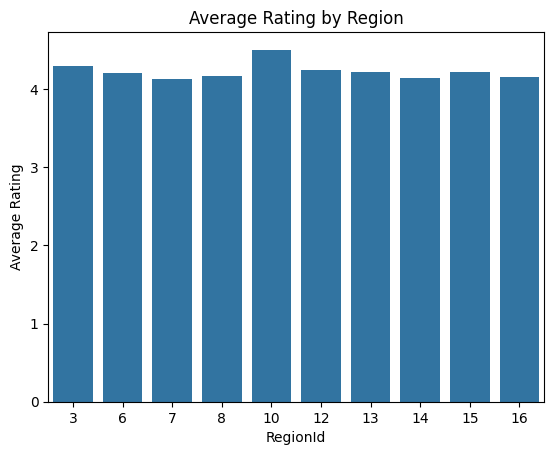

In [8]:
# Histogram of ratings
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Boxplot: Ratings per Attraction
top_attractions = df['AttractionId'].value_counts().head(10).index
sns.boxplot(x='AttractionId', y='Rating', data=df[df['AttractionId'].isin(top_attractions)])
plt.title('Rating Distribution for Top 10 Attractions')
plt.xlabel('AttractionId')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Region-wise rating distribution if RegionId exists
if 'RegionId' in df.columns:
    region_ratings = df.groupby('RegionId')['Rating'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=region_ratings.index, y=region_ratings.values)
    plt.title('Average Rating by Region')
    plt.xlabel('RegionId')
    plt.ylabel('Average Rating')
    plt.show()


 # 4.	Model Training:

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Basic Feature Engineering

df['UserAvgRating'] = df.groupby('UserId')['Rating'].transform('mean')
df['UserReviewCount'] = df.groupby('UserId')['Rating'].transform('count')
df['AttractionAvgRating'] = df.groupby('AttractionId')['Rating'].transform('mean')
df['AttractionReviewCount'] = df.groupby('AttractionId')['Rating'].transform('count')

# 2. Prepare Features and Target
features = [
    'VisitYear', 'VisitMonth', 'ContinentId', 'CountryId',
    'AttractionTypeId','UserReviewCount','AttractionAvgRating','AttractionReviewCount',
      'VisitMode','UserAvgRating'  
]

target = 'Rating'

X = df[features]
y = df[target]

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


numeric_features = ['VisitYear', 'VisitMonth', 'UserAvgRating', 'UserReviewCount','AttractionAvgRating','AttractionReviewCount']
categorical_features = ['ContinentId', 'CountryId', 'AttractionTypeId', 'VisitMode']


preprocessor = ColumnTransformer(
    transformers=[
        ('poly', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=4, include_bias=False))
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 5. Model Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 6. Train Model
model.fit(X_train, y_train)

# 7. Evaluate
y_pred = model.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")



R2 Score: 0.7460
MSE: 0.2392
MAE: 0.2742
RMSE: 0.4891


In [12]:
y_pred = model.predict(X_train)

print(f"R2 Score: {r2_score(y_train, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_train, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred):.4f}")
print(f"RMSE: {root_mean_squared_error(y_train, y_pred):.4f}")


R2 Score: 0.7502
MSE: 0.2353
MAE: 0.2707
RMSE: 0.4851


○	Classification Task:

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

clf_ct = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=15,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced' ))
])

clf_ct.fit(X_train, y_train)
y_pred_ct = clf_ct.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_ct))
print("Random Forest Accuracy score:")
print(accuracy_score(y_test,y_pred_ct))
print("Random Forest Confussion matrix:")

print(confusion_matrix (y_test,y_pred_ct))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.70      0.65       257
           2       0.54      0.67      0.60       409
           3       0.57      0.73      0.64      1509
           4       0.74      0.73      0.74      3632
           5       0.91      0.82      0.86      4779

    accuracy                           0.77     10586
   macro avg       0.67      0.73      0.70     10586
weighted avg       0.78      0.77      0.77     10586

Random Forest Accuracy score:
0.7670508218401663
Random Forest Confussion matrix:
[[ 181   30   40    5    1]
 [  32  275   89   12    1]
 [  42   93 1104  242   28]
 [  31   83  511 2665  342]
 [  14   29  179  662 3895]]


In [14]:

y_pred_ct = clf_ct.predict(X_train)

print("Random Forest Classification Report:")
print(classification_report(y_train, y_pred_ct))
print("Random Forest Accuracy score:")
print(accuracy_score(y_train,y_pred_ct))
print("Random Forest Confussion matrix:")

print(confusion_matrix (y_train,y_pred_ct))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.97      0.85      1006
           2       0.70      0.92      0.80      1626
           3       0.69      0.86      0.77      6221
           4       0.82      0.82      0.82     14334
           5       0.96      0.85      0.90     19157

    accuracy                           0.85     42344
   macro avg       0.79      0.88      0.83     42344
weighted avg       0.86      0.85      0.85     42344

Random Forest Accuracy score:
0.8455979595692424
Random Forest Confussion matrix:
[[  974    14    17     1     0]
 [   43  1493    77    13     0]
 [  107   209  5323   513    69]
 [   92   290  1577 11723   652]
 [   66   114   697  1987 16293]]


In [15]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 15, 20],
    'classifier__min_samples_split': [5, 10],
    'classifier__min_samples_leaf': [2, 4]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=clf_ct,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy', 
    verbose=2,
    n_jobs=-1
)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


clf_ct.fit(X_train, y_train)
y_pred_ct = clf_ct.predict(X_test)

print("Classification Report (Test):")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best Cross-Validation Accuracy: 0.7725060997745983
Classification Report (Test):
              precision    recall  f1-score   support

           1       0.60      0.70      0.65       257
           2       0.54      0.67      0.60       409
           3       0.57      0.73      0.64      1509
           4       0.74      0.73      0.74      3632
           5       0.91      0.82      0.86      4779

    accuracy                           0.77     10586
   macro avg       0.67      0.73      0.70     10586
weighted avg       0.78      0.77      0.77     10586

Confusion Matrix:
[[ 181   30   40    5    1]
 [  32  275   89   12    1]
 [  42   93 1104  242   28]
 [  31   83  511 2665  342]
 [  14   29  179  662 3895]]
Test Accuracy: 0.7670508218401663
Random Forest Classifica

In [17]:
import mysql.connector


# Connect to the MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="NanDha@12345",
    database="tourism",
    auth_plugin='mysql_native_password'
)

cursor = conn.cursor()

# Create table (if not exists)
create_table_query = """
CREATE TABLE IF NOT EXISTS TourismRatings (
    TransactionId INT,
    UserId INT,
    VisitYear INT,
    VisitMonth INT,
    AttractionId INT,
    Rating INT,
    ContinentId INT,
    RegionId INT,
    CountryId INT,
    CityId INT,
    Country VARCHAR(100),
    Region VARCHAR(100),
    Continent VARCHAR(100),
    AttractionCityId INT,
    AttractionTypeId INT,
    Attraction VARCHAR(255),
    AttractionAddress VARCHAR(255),
    AttractionType VARCHAR(100),
    VisitModeId INT,
    VisitMode VARCHAR(50)
);
"""
cursor.execute(create_table_query)

# Insert data from DataFrame into SQL
insert_query = """
INSERT INTO TourismRatings (
    TransactionId, UserId, VisitYear, VisitMonth, AttractionId, Rating,
    ContinentId, RegionId, CountryId, CityId,
    Country, Region, Continent,
    AttractionCityId, AttractionTypeId, Attraction, AttractionAddress, AttractionType,
    VisitModeId, VisitMode
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Convert DataFrame rows to list of tuples and insert
data_to_insert = df[[
    'TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'AttractionId', 'Rating',
    'ContinentId', 'RegionId', 'CountryId', 'CityId',
    'Country', 'Region', 'Continent',
    'AttractionCityId', 'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType',
    'VisitModeId', 'VisitMode'
]].where(pd.notnull(df), None).values.tolist()

cursor.executemany(insert_query, data_to_insert)
conn.commit()

print(f"{cursor.rowcount} rows were inserted.")

# Close connection
cursor.close()
conn.close()


52930 rows were inserted.
